<h2 align="center"><b>💳 Credit Card Fraud Detection</b></h2>

<p align="center">
  <img src="wallet.jpg" width="600"/>
</p>

### **Problem Statement**

Credit card fraud causes billions of dollars in losses annually and poses a critical challenge for financial institutions. The goal of this project is to develop an effective machine learning model that can identify fraudulent credit card transactions with high precision and recall, minimizing both false positives and missed frauds.

### **Dataset Used**

- **Source**: [Kaggle - Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)  
- **Description**: The dataset contains transactions made by European credit cardholders in September 2013.  
- **Size**: 284,807 transactions, with 492 frauds (~0.17%)  
- **Features**:  
  - `V1–V28`: PCA-transformed features to protect confidentiality  
  - `Time`, `Amount`: Raw features  
  - `Class`: Target (0 - Legit, 1 - Fraud)

### **Impact**
- Built and compared three machine learning models (Logistic Regression, Random Forest, XGBoost) using SMOTE to handle severe class imbalance.
- Achieved over 83% F1-score for fraud detection with Random Forest and XGBoost.
- Visualized feature distribution, model performance, and confusion matrices for interpretability.
- Demonstrated the value of machine learning in combating financial fraud and reducing manual review costs.

In [1]:
# Importing necessary libraries for data cleaning, data analysis, and data visualization
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Step 1: Load and Explore the Data

In [2]:
# Loading data into dataframe df, print first few rows of the dataset
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Number of rows and columns in the dataset
df.shape

(284807, 31)

In [4]:
# identifying null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Step 2: Data Visualization
- Visualize Class Imbalance
- Transaction Amount by Class
- Transaction Count over Time
- Correlation heatmap of Features
- Distrubution of Features by Class

In [7]:
# Print value count of Class, Legit - 0, Fraud - 1
df['Class'].value_counts()
print(f"Legitimate: {df['Class'].value_counts()[0]}")
print(f"Fraud: {df['Class'].value_counts()[1]}")

Legitimate: 284315
Fraud: 492


### With Countplot we can clearly visualize that dataset is highly imbalances

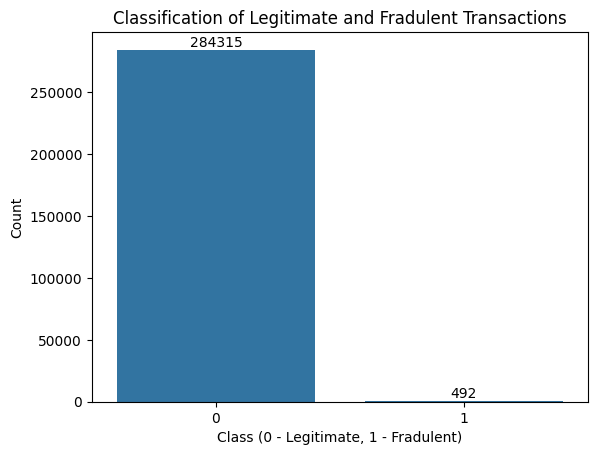

In [8]:
plt.title("Classification of Legitimate and Fradulent Transactions")
ax = sns.countplot(x='Class', data=df)
for i in ax.containers:
    ax.bar_label(i)

plt.xlabel("Class (0 - Legitimate, 1 - Fradulent)")
plt.ylabel("Count")
plt.show()

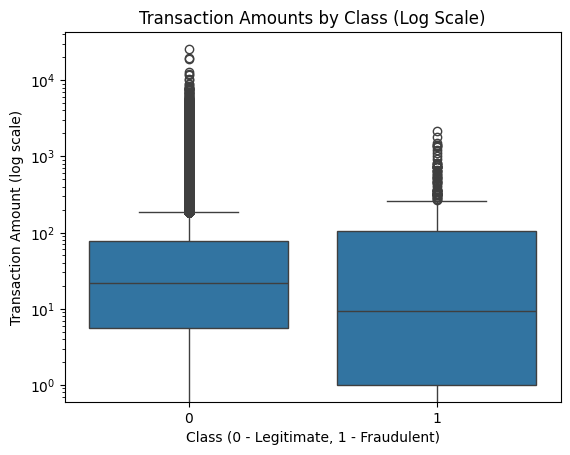

In [9]:
plt.title("Transaction Amounts by Class (Log Scale)")
sns.boxplot(x="Class", y="Amount", data=df)
plt.yscale("log")

plt.xlabel("Class (0 - Legitimate, 1 - Fraudulent)")
plt.ylabel("Transaction Amount (log scale)")

plt.show()

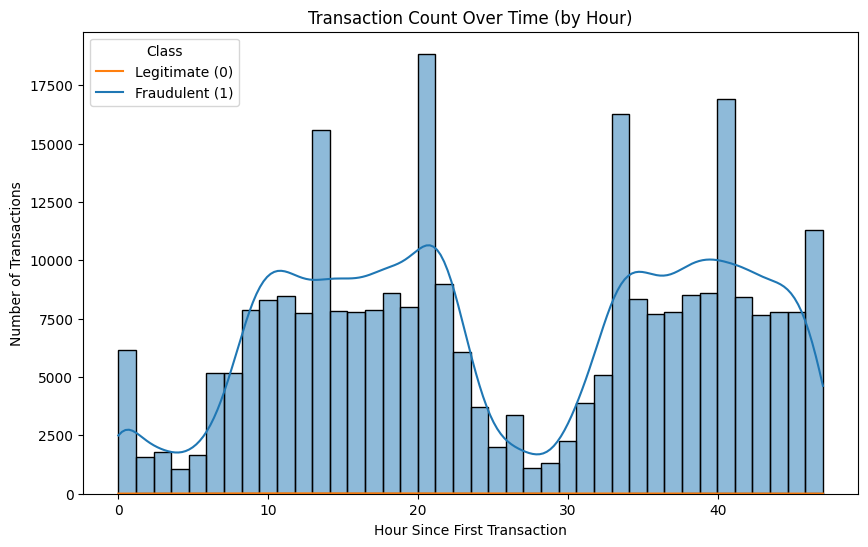

In [10]:
df["Hour"] = df["Time"] // 3600

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Hour", hue="Class", bins=40, kde=True)

plt.title("Transaction Count Over Time (by Hour)")
plt.xlabel("Hour Since First Transaction")
plt.ylabel("Number of Transactions")
plt.legend(title="Class", labels=['Legitimate (0)', 'Fraudulent (1)'])

plt.show()

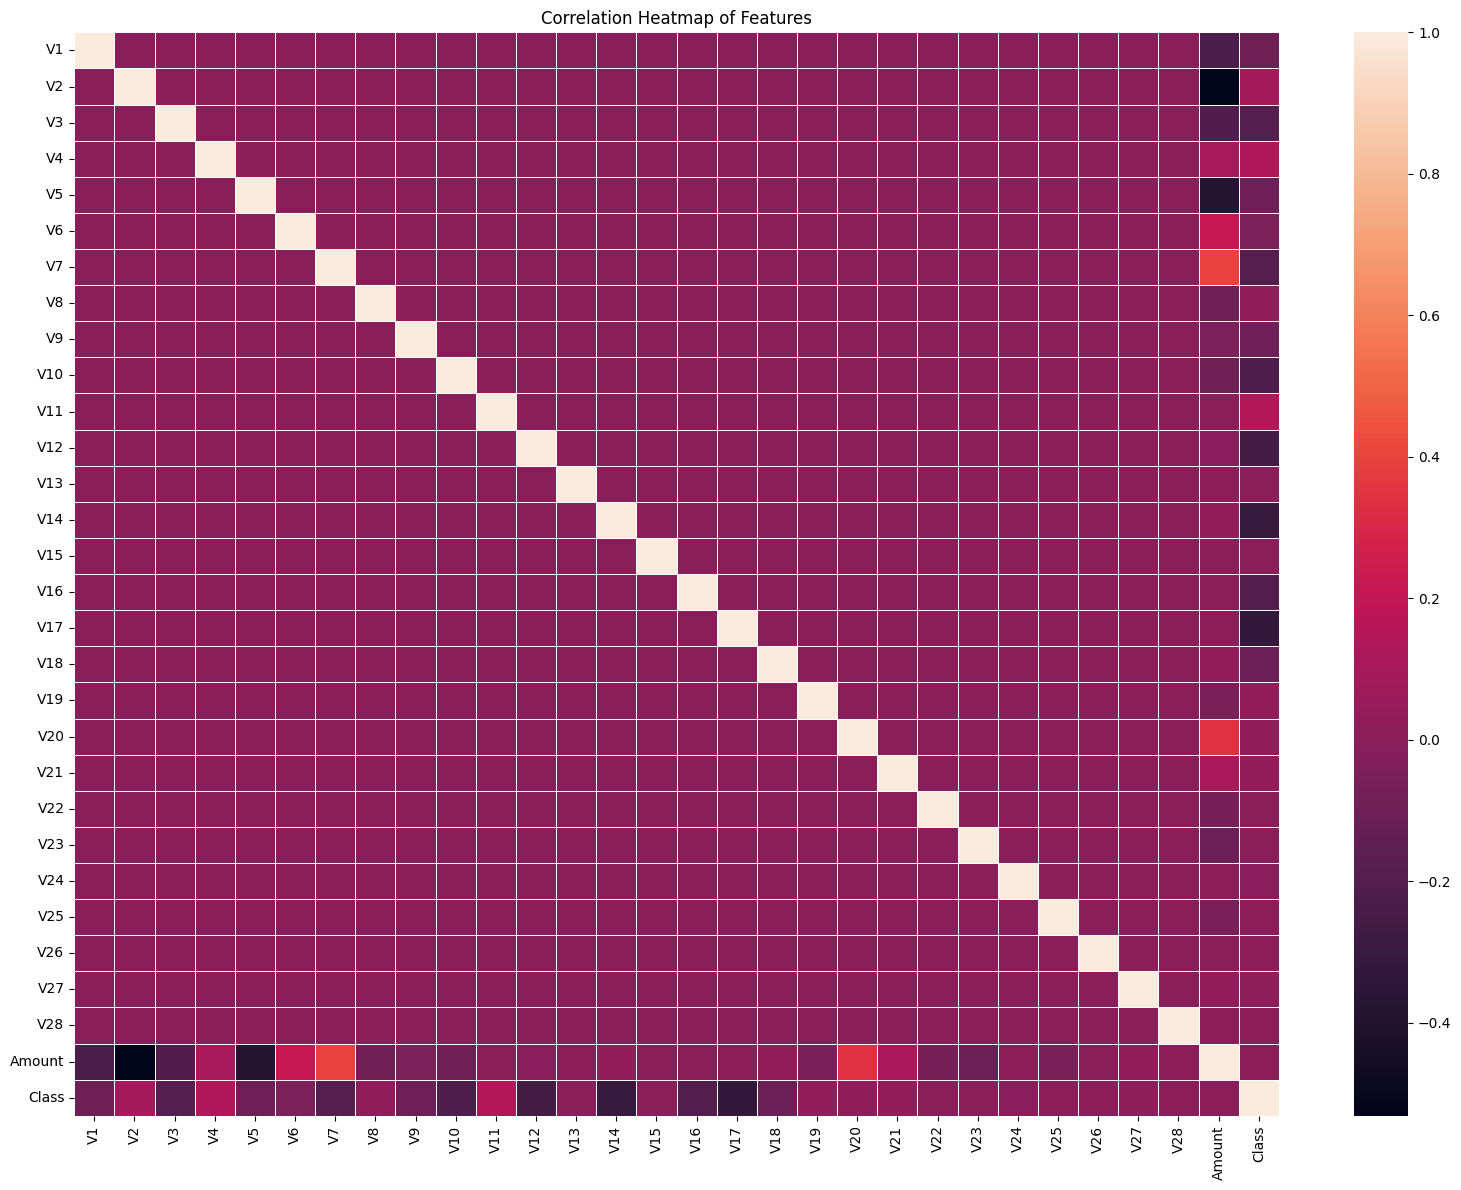

In [11]:
corr_matrix = df.drop(columns=["Time", "Hour"]).corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()

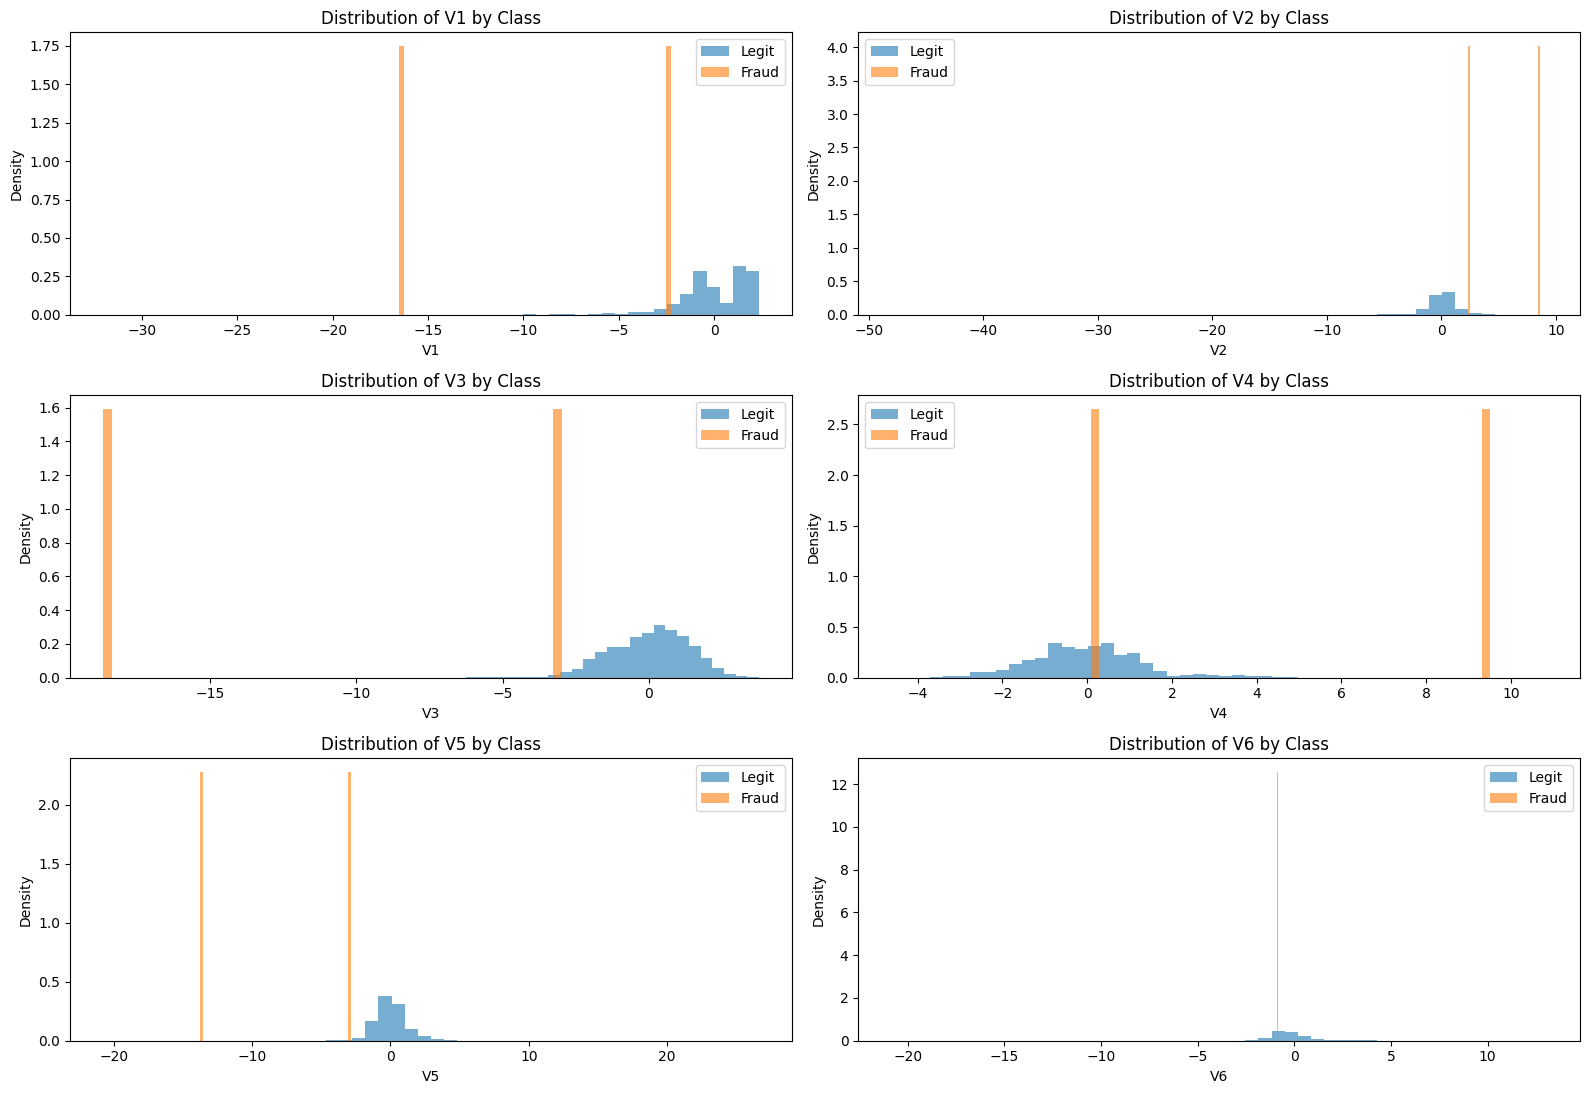

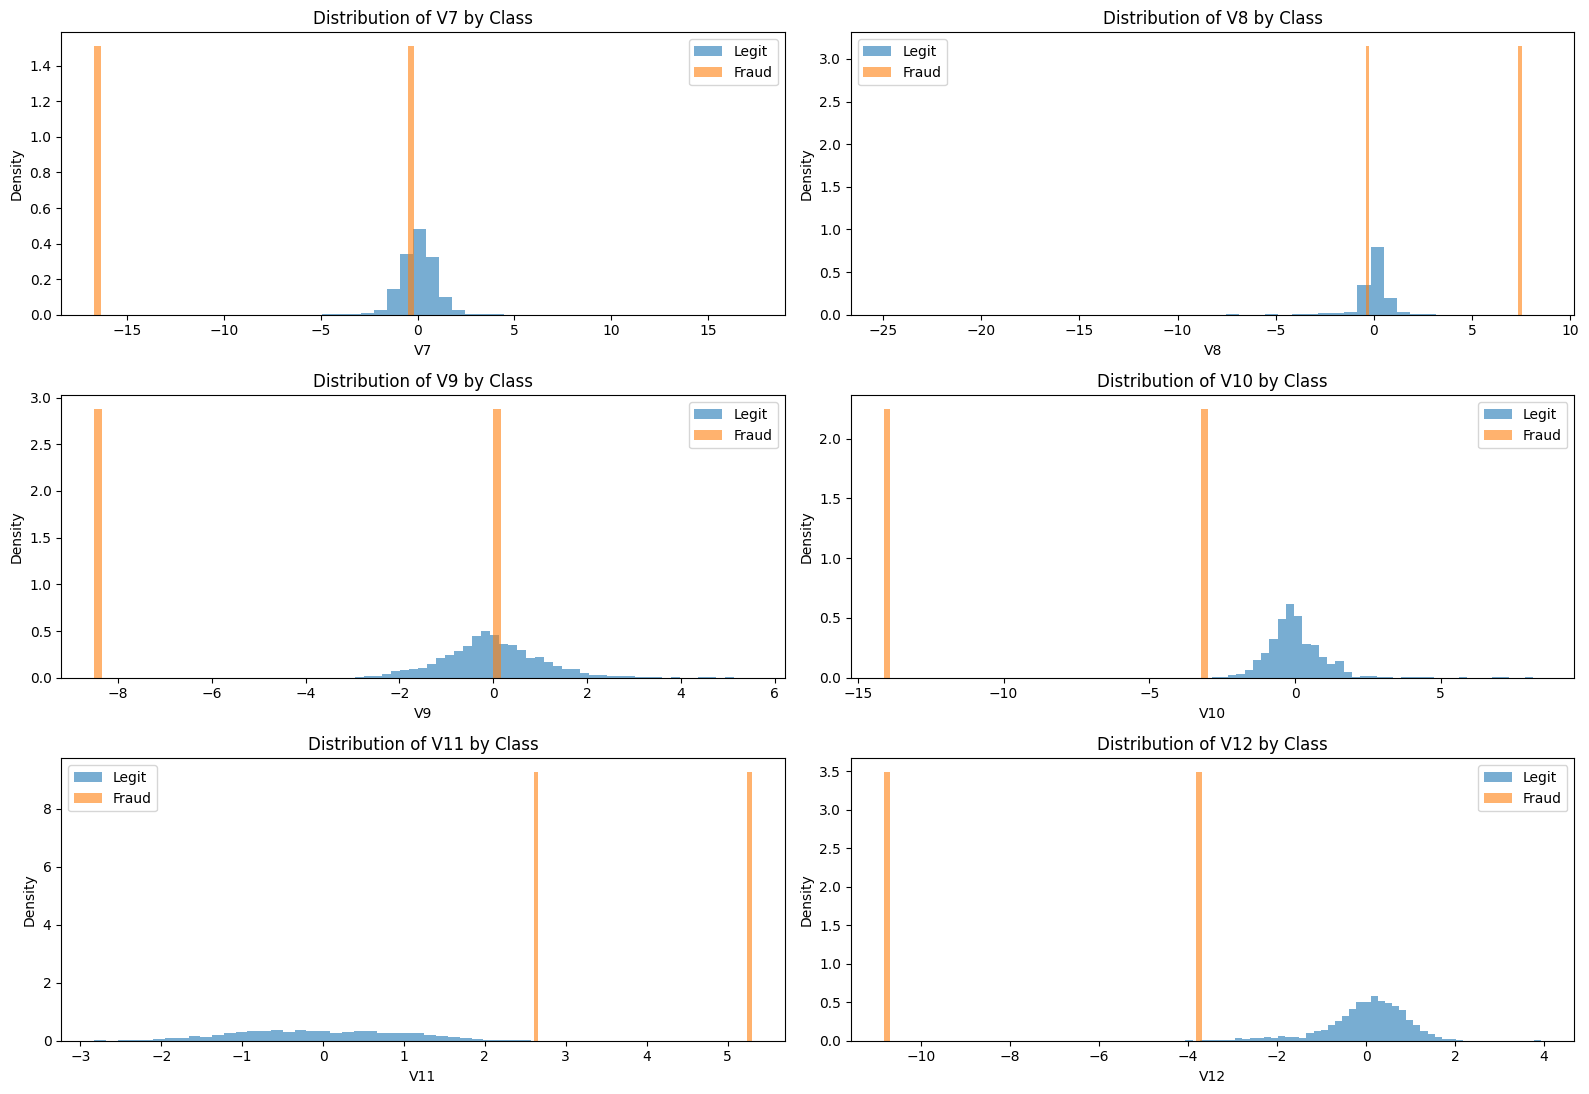

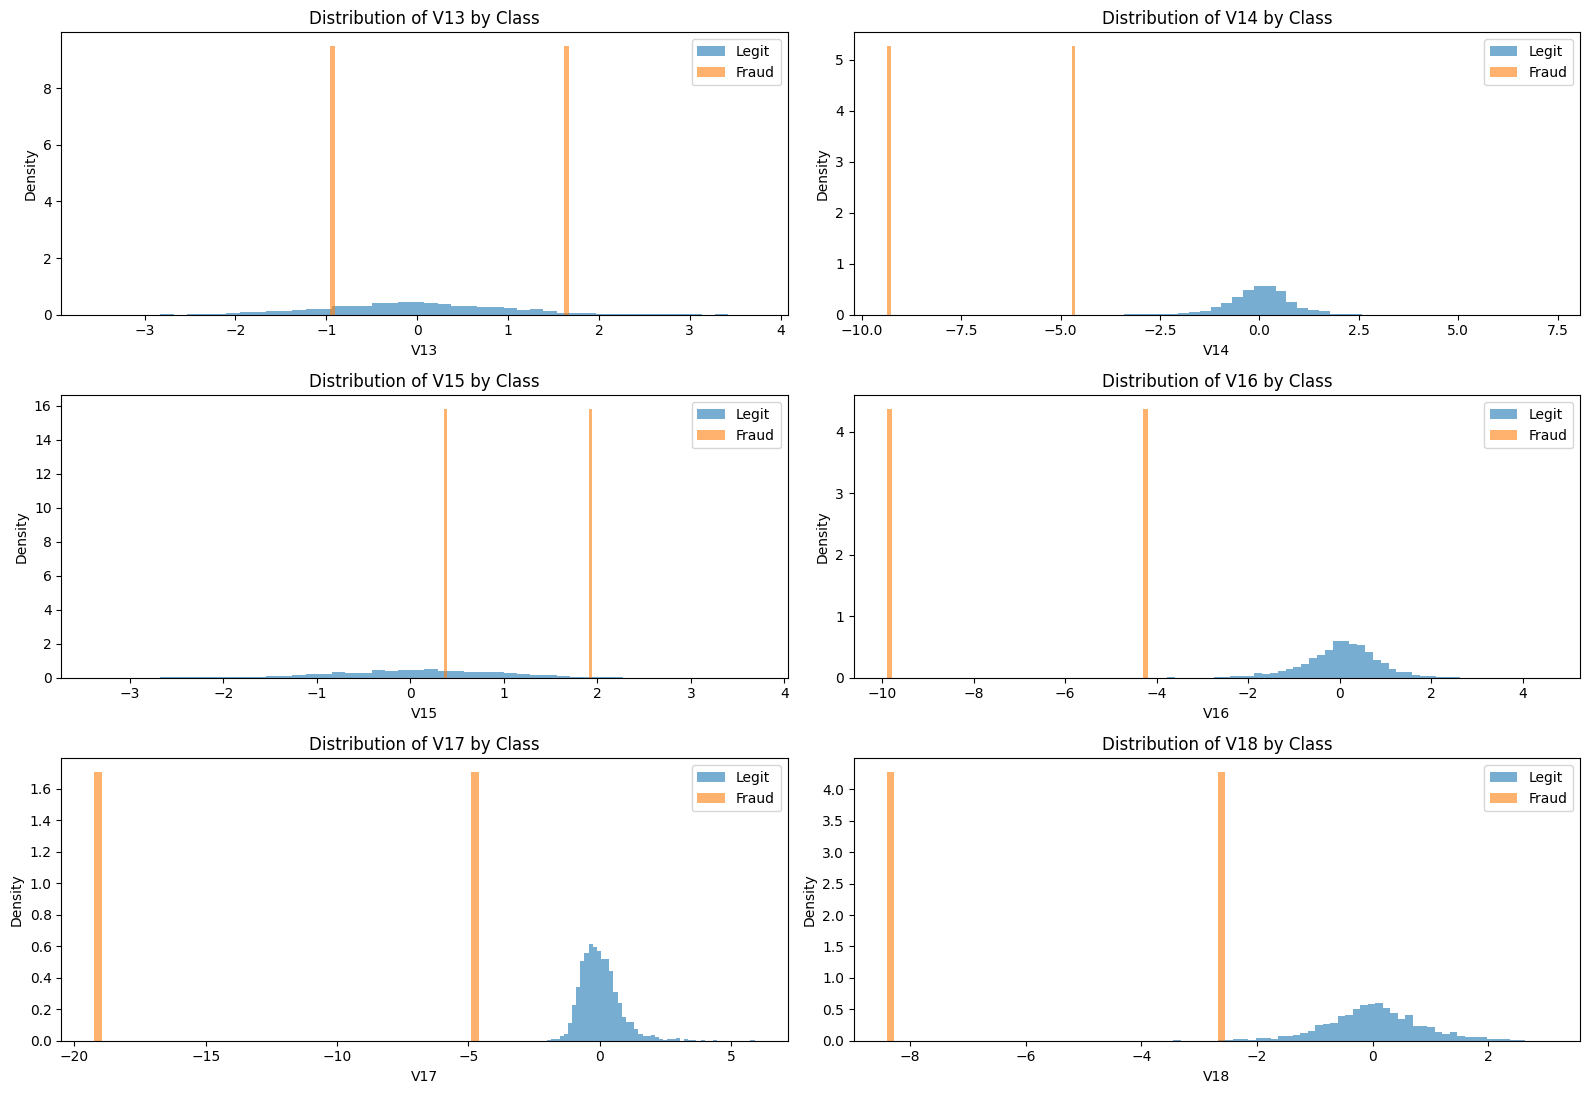

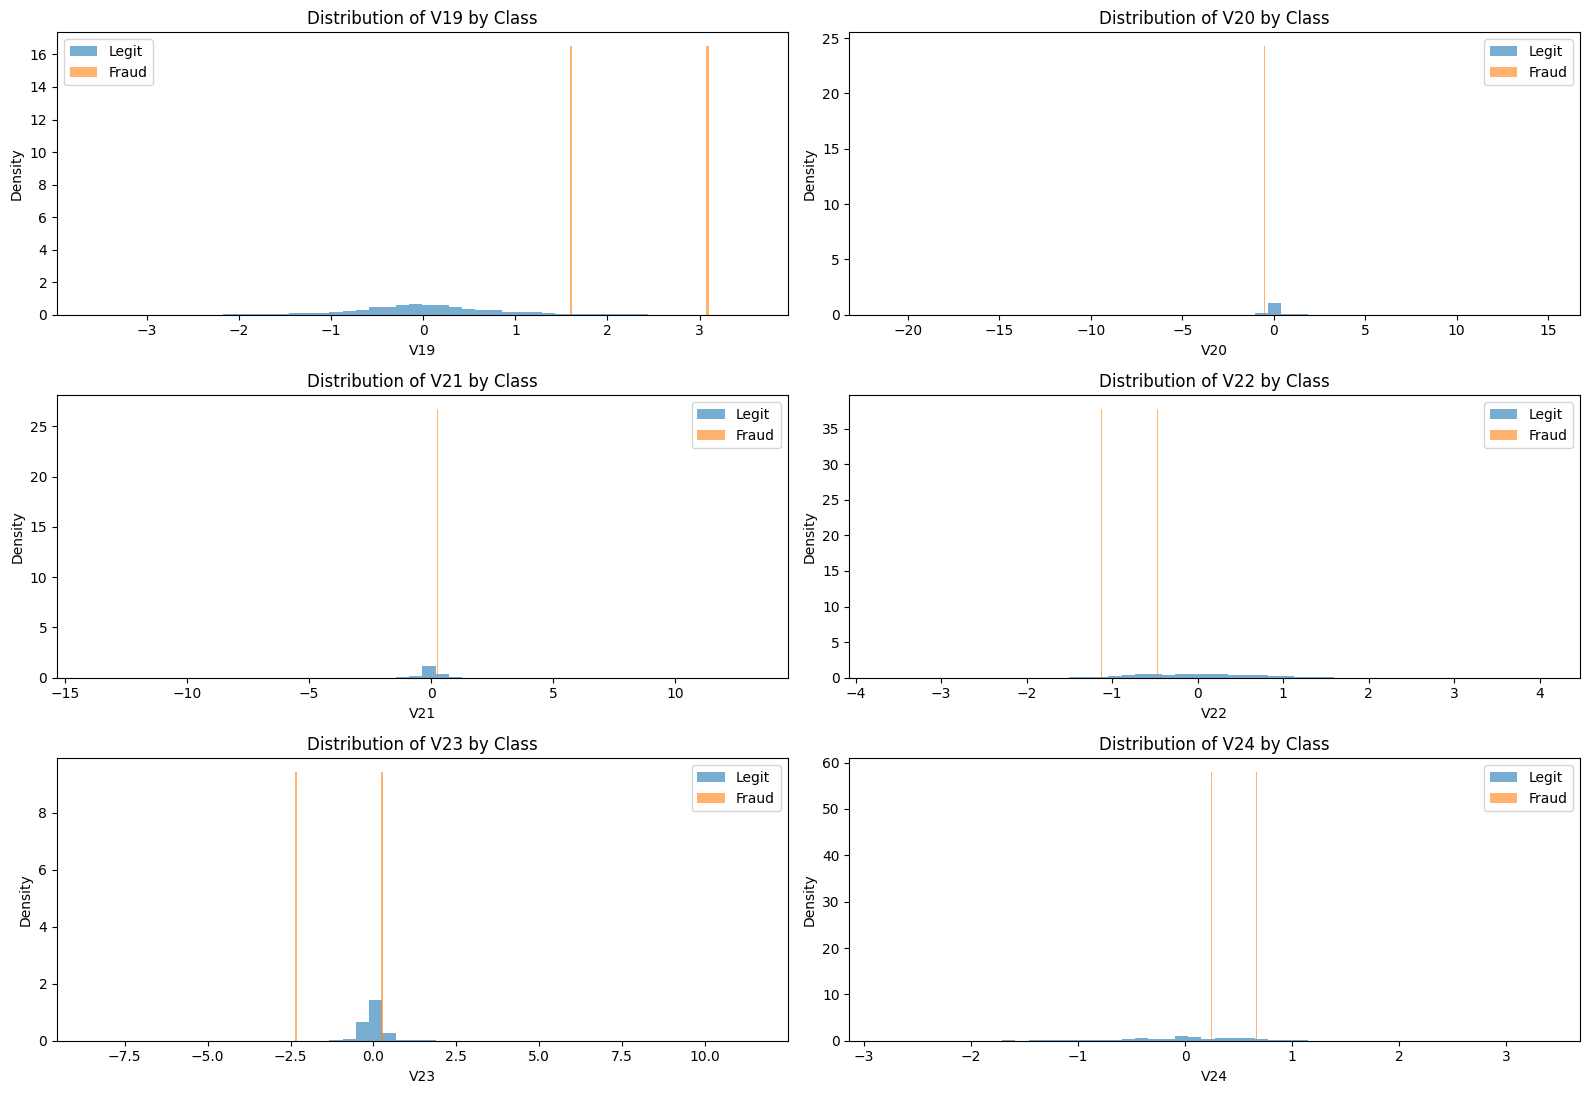

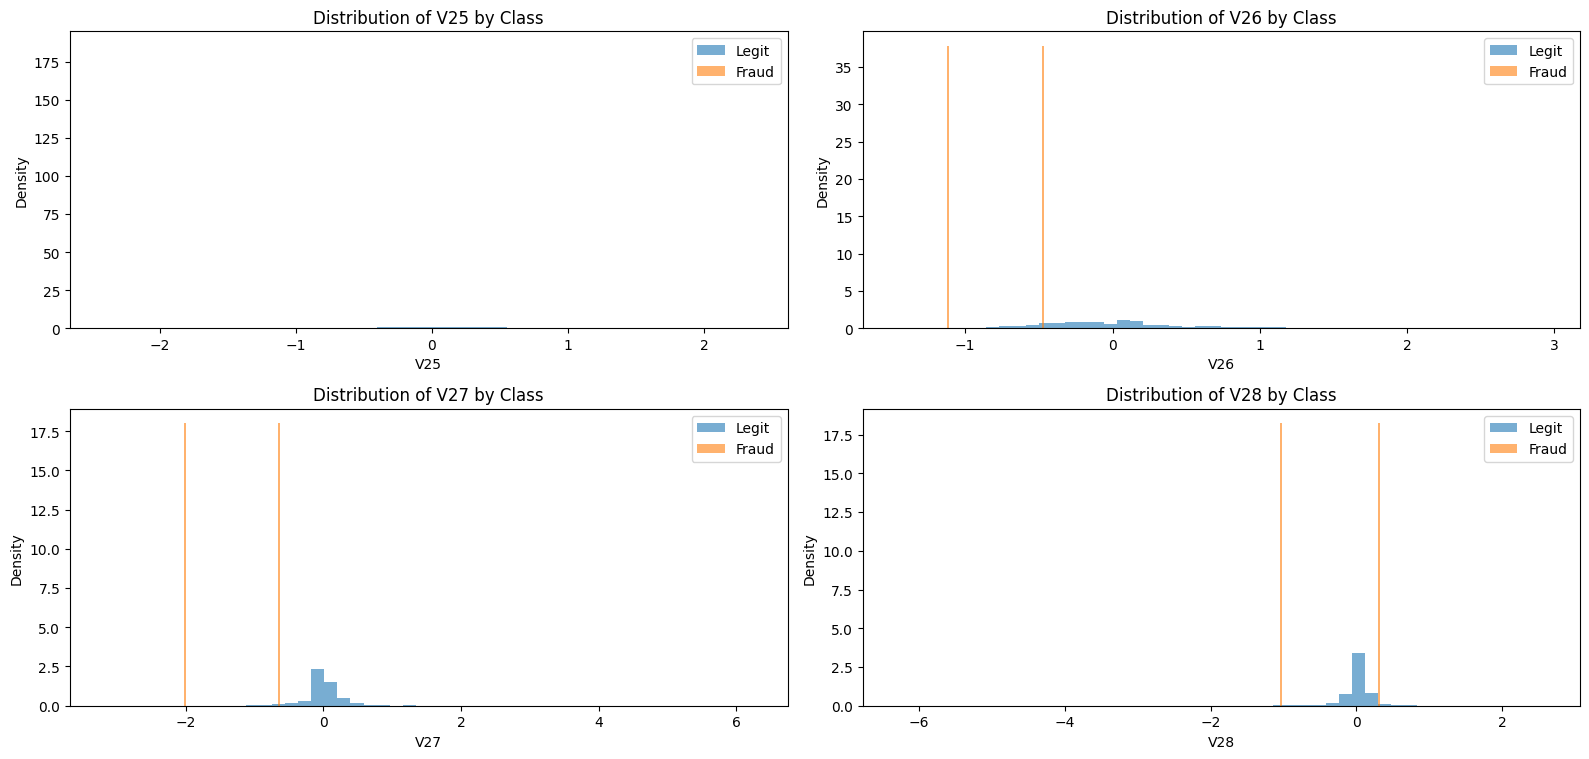

In [12]:
columns = ['V' + str(i) for i in range(1, 29)] + ['Class']
df = df.apply(pd.to_numeric, errors='coerce').dropna()

sample_df = df.sample(n=3000, random_state=42)
features = ['V' + str(i) for i in range(1, 29)]

chunks = [features[i:i + 6] for i in range(0, len(features), 6)]

for chunk_num, chunk in enumerate(chunks, 1):
    plt.figure(figsize=(16, 12))
    for i, feature in enumerate(chunk, 1):
        plt.subplot(3, 2, i)
        plt.hist(sample_df[sample_df['Class'] == 0][feature], bins=50, alpha=0.6, label='Legit', density=True)
        plt.hist(sample_df[sample_df['Class'] == 1][feature], bins=50, alpha=0.6, label='Fraud', density=True)
        plt.title(f'Distribution of {feature} by Class')
        plt.xlabel(feature)
        plt.ylabel('Density')
        plt.legend()
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

### Step 3: Class Balancing and Feature Distribution

In [13]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Split the dataset into training and testing sets (70% train, 30% test)
# Stratify=y ensures the class ratio is maintained in both splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Initialize SMOTE (Synthetic Minority Oversampling Technique)
sm = SMOTE(random_state=42)

# Apply SMOTE only on the training set to balance the classes
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Display class distribution before and after applying SMOTE
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: Class
0    199020
1       344
Name: count, dtype: int64
After SMOTE: Class
0    199020
1    199020
Name: count, dtype: int64


**1. Logistic Regression**

**Why Used:**
A simple, interpretable baseline model that works well for linearly separable data. It’s often the first step in evaluating classification tasks, especially when explainability is important.

**Handling Imbalance:**
Used class_weight='balanced' and SMOTE to address class imbalance.
- Performance -
- Precision (Fraud): 0.13
- Recall (Fraud): 0.85
- F1-Score (Fraud): 0.22
- ROC-AUC: 0.92

**Conclusion:**
Despite a high recall and ROC-AUC, the precision was very low. It predicted most frauds correctly but also falsely flagged many legit transactions. Not ideal for real-world use.


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.13      0.85      0.22       148

    accuracy                           0.99     85443
   macro avg       0.56      0.92      0.61     85443
weighted avg       1.00      0.99      0.99     85443


Confusion Matrix for Logistic Regression:


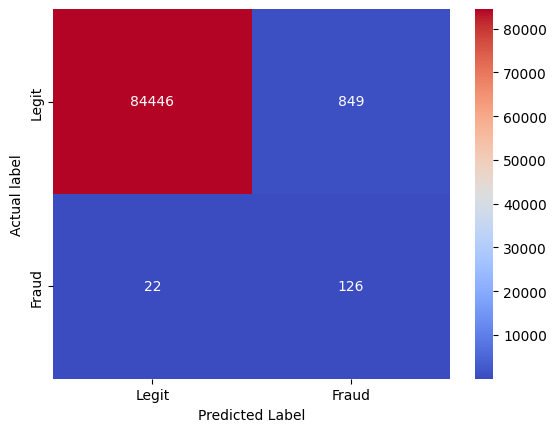

ROC-AUC Score for Logistic Regression: 0.9206988306085556


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize and train the Logistic Regression model
# class_weight='balanced' helps handle class imbalance during training
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced')
lr_model.fit(X_train_res, y_train_res)

# Make predictions on the original (imbalanced) test set
y_pred_lr = lr_model.predict(X_test)

# Print classification report to show precision, recall, f1-score
print("\nClassification Report for Logistic Regression:\n", classification_report(y_test, y_pred_lr))

# Generate and visualize the confusion matrix
print("\nConfusion Matrix for Logistic Regression:")
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt='d', xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual label')
plt.show()

# Print ROC-AUC score to evaluate model's ability to distinguish between classes
print("ROC-AUC Score for Logistic Regression:", roc_auc_score(y_test, y_pred_lr))

**2. Random Forest**

**Why Used:**
A powerful ensemble method that handles non-linear relationships and is robust to outliers and imbalance.

**Handling Imbalance:**
SMOTE applied on training data, and class_weight='balanced' used.
- Performance -
- Precision (Fraud): 0.86
- Recall (Fraud): 0.80
- F1-Score (Fraud): 0.83
- ROC-AUC: 0.90

**Conclusion:**
Provided a strong balance between catching fraud and minimizing false alarms. A very practical and explainable model for deployment.


Classification Repor for Random Forestt:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.80      0.83       148

    accuracy                           1.00     85443
   macro avg       0.93      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443


Confusion Matrix for Random Forest:


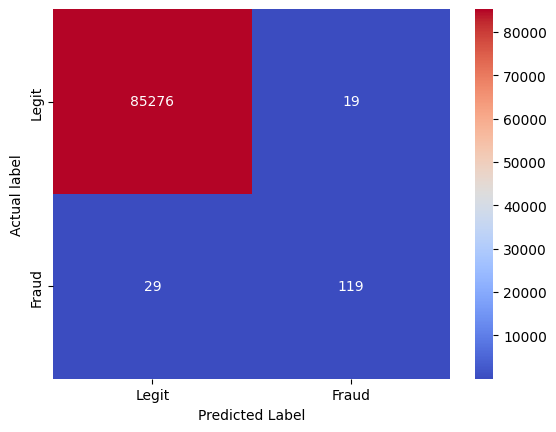

ROC-AUC Score for Random Forest: 0.90191564886887


In [15]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest classifier
# class_weight='balanced': handles class imbalance by adjusting weights
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train_res, y_train_res)

# Make predictions on the original (imbalanced) test set
y_pred_rf = rf_model.predict(X_test)

# Print classification report to show precision, recall, f1-score
print("\nClassification Repor for Random Forestt:\n", classification_report(y_test, y_pred_rf))

# Generate and visualize the confusion matrix
print("\nConfusion Matrix for Random Forest:")
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt='d', xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual label')
plt.show()

# Print ROC-AUC score to evaluate model's ability to distinguish between classes
print("ROC-AUC Score for Random Forest:", roc_auc_score(y_test, y_pred_rf))

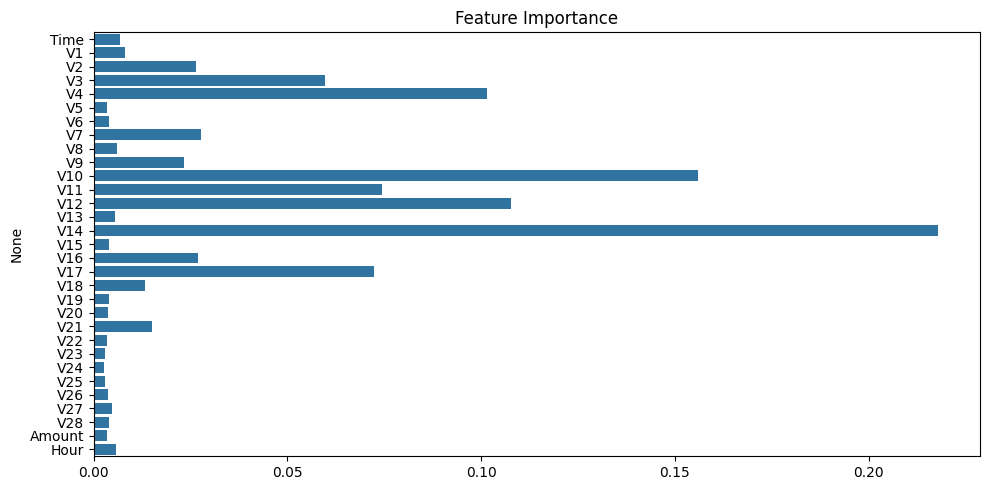

In [16]:
importances = rf_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

**3. XGBoost**

**Why Used:**
A gradient boosting algorithm known for its performance and scalability on structured/tabular data.

**Handling Imbalance:**
SMOTE applied to training data and scale_pos_weight used to address imbalance.
- Performance -
- Precision (Fraud): 0.85
- Recall (Fraud): 0.82
- F1-Score (Fraud): 0.83
- ROC-AUC: 0.91

**Conclusion:**
Delivered excellent performance with balanced precision and recall. Slightly better recall than Random Forest. Ideal for real-time fraud detection systems.


Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.82      0.83       148

    accuracy                           1.00     85443
   macro avg       0.93      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443


Confusion Matrix for XGBoost:


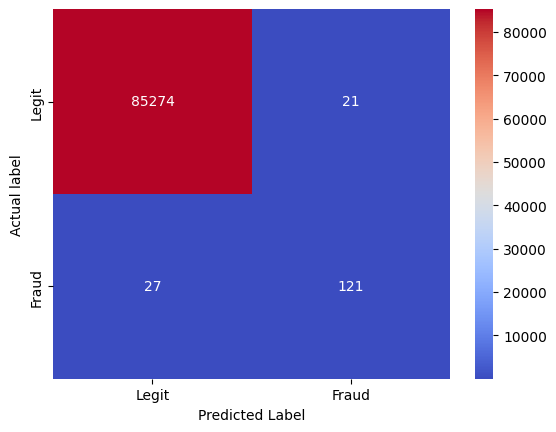

ROC-AUC Score for XGBoost: 0.9086606816089786


In [17]:
import xgboost as xgb

# Initialize and train the XGBoost model
# scale_pos_weight=1: weight given to the positive class (can be tuned)
# use_label_encoder=False: avoids deprecation warning
# eval_metric='logloss': metric used during training
xgb_model = xgb.XGBClassifier(scale_pos_weight=1, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_res, y_train_res)

# Make predictions on the original (imbalanced) test set
y_pred_xgb = xgb_model.predict(X_test)

# Print classification report to show precision, recall, f1-score
print("\nClassification Report for XGBoost:\n", classification_report(y_test, y_pred_xgb))

# Generate and visualize the confusion matrix
print("\nConfusion Matrix for XGBoost:")
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt='d', xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual label')
plt.show()

# Print ROC-AUC score to evaluate model's ability to distinguish between classes
print("ROC-AUC Score for XGBoost:", roc_auc_score(y_test, y_pred_xgb))

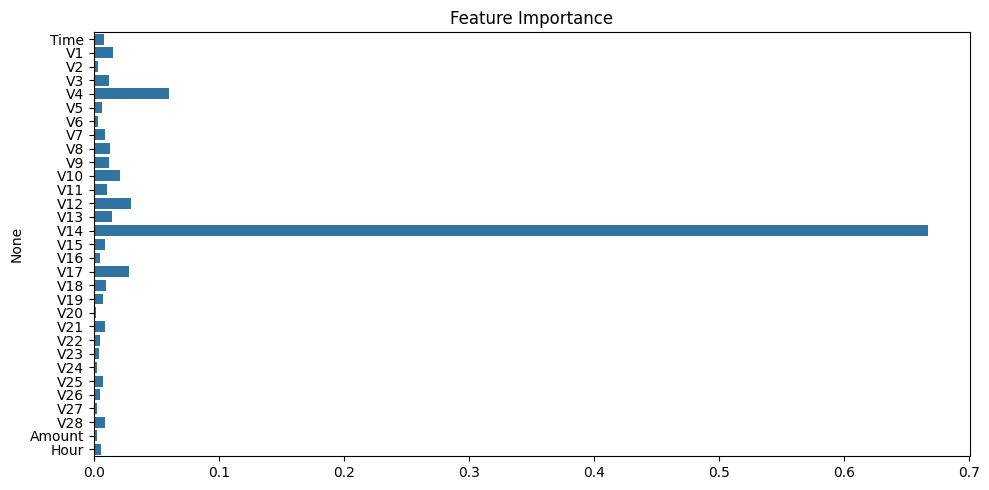

In [18]:
importances = xgb_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

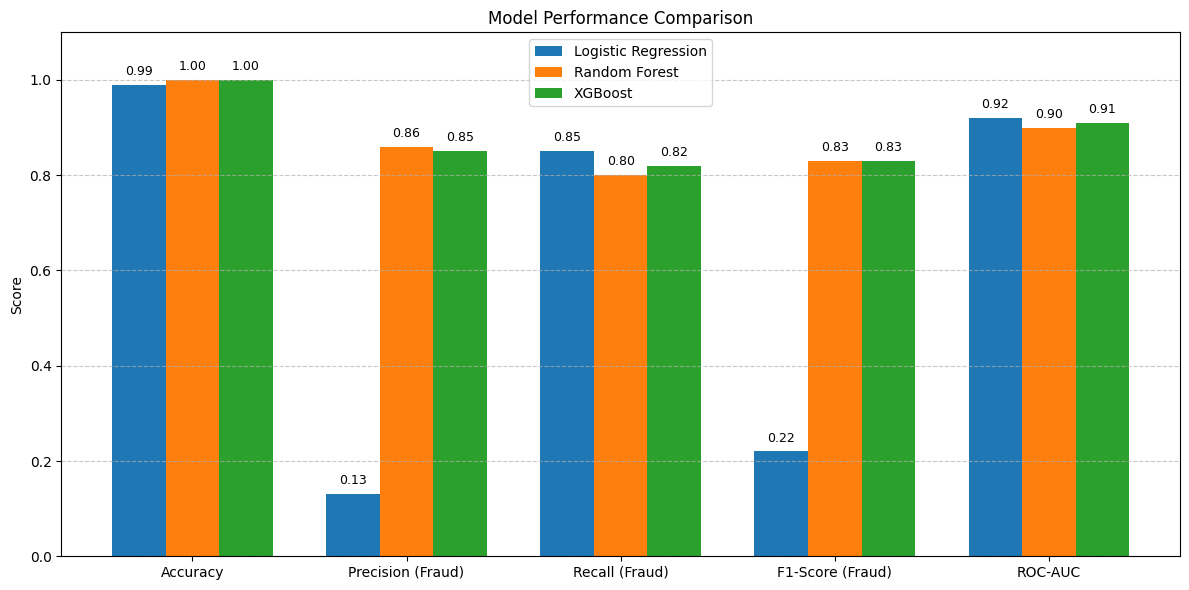

In [19]:
# Define the metrics we want to compare
metrics = ['Accuracy', 'Precision (Fraud)', 'Recall (Fraud)', 'F1-Score (Fraud)', 'ROC-AUC']

# Scores for each model (based on your evaluation results)
logistic = [0.99, 0.13, 0.85, 0.22, 0.92]
random_forest = [1.00, 0.86, 0.80, 0.83, 0.90]
xgboost = [1.00, 0.85, 0.82, 0.83, 0.91]

# Set up bar width and positions for grouped bars
bar_width = 0.25
x = np.arange(len(metrics))

plt.figure(figsize=(12, 6))
# Plot bars for each model
bars1 = plt.bar(x - bar_width, logistic, width=bar_width, label='Logistic Regression')
bars2 = plt.bar(x, random_forest, width=bar_width, label='Random Forest')
bars3 = plt.bar(x + bar_width, xgboost, width=bar_width, label='XGBoost')

# Annotate bar heights with exact values
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 5),
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=9)
        
# Final formatting
plt.xticks(x, metrics)
plt.ylim(0, 1.1)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

## Final Conclusion

In this project, I tackled the problem of detecting fraudulent credit card transactions using machine learning techniques. The dataset presented a significant class imbalance (~0.17% fraud cases), which was handled using SMOTE (Synthetic Minority Oversampling Technique) to ensure the models learned to detect fraud more effectively.

I trained and evaluated three machine learning models:
- **Logistic Regression**
- **Random Forest**
- **XGBoost**

### Key Findings:

- **Logistic Regression** achieved the highest **ROC-AUC (0.92)** but suffered from very low **precision (0.13)**, making it unsuitable for real-world fraud detection where false positives must be minimized.
  
- **Random Forest** and **XGBoost** significantly outperformed Logistic Regression in practical metrics like **precision**, **recall**, and **F1-score** — each achieving over **83% F1-score** and strong balance between catching frauds and minimizing false alarms.

- **XGBoost** showed slightly better **recall (0.82)**, while **Random Forest** had marginally better **precision (0.86)**, making both strong candidates for production.

- The model performance comparison chart visually supported the conclusion, offering a clear view of trade-offs.

### Visualizations and Analysis:
- Explored class imbalance and feature distributions
- Analyzed PCA-transformed features (`V1–V28`)
- Visualized time trends, amount distributions, and class-wise feature behavior
- Used confusion matrices, classification reports, and ROC-AUC for model evaluation

---

### Final Recommendation:

> Based on model performance and interpretability, **XGBoost** is recommended for deployment due to its strong balance between precision and recall, robust performance on imbalanced data, and scalability.

This project demonstrates the power of machine learning in the financial sector, helping institutions **detect fraud more accurately**, **reduce financial loss**, and **improve customer trust**.